*Character level language model*  >>>>  `Make More

**imports** 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Dataset info 

In [2]:
word_list = open("names.txt", 'r').read().splitlines()

In [3]:
len(word_list)

32033

In [4]:
min(len(x) for x in word_list), max(len(x) for x in word_list) 

(2, 15)

### Bigrams

In [5]:
b = {} #To store count of similar pattern in bigrams

In [6]:
 """ generating a list of all possible dio char from our word list with special char : <*> --> start ; <#> --> end """
for w in word_list:                           
    w = ['<*>'] + list(w) + ['<#>']
    for char1, char2 in zip(w, w[1:]):
        bigram = (char1, char2)
        b[bigram] = b.get(bigram, 0) + 1

In [7]:
#sorted(b.items(), key = lambda kv: -kv[1])  # statistics of bi - chars decending order of frequency acc to our data

In [8]:
N = torch.zeros((27,  27), dtype = torch.int32)

In [9]:
# word to integer mapping
chars = sorted(list(set(''.join(word_list)))) 
s_to_i = {s:i + 1 for i, s in enumerate(chars)}

s_to_i['!'] = 0

i_to_s = {i:s for s, i in s_to_i.items()}

In [10]:
# storing all the bi-char data in tensor
for w in word_list:                           
    w = ['!'] + list(w) + ['!']
    for char1, char2 in zip(w, w[1:]):
        _x = s_to_i[char1]
        _y = s_to_i[char2]
        N[_x, _y] += 1
        

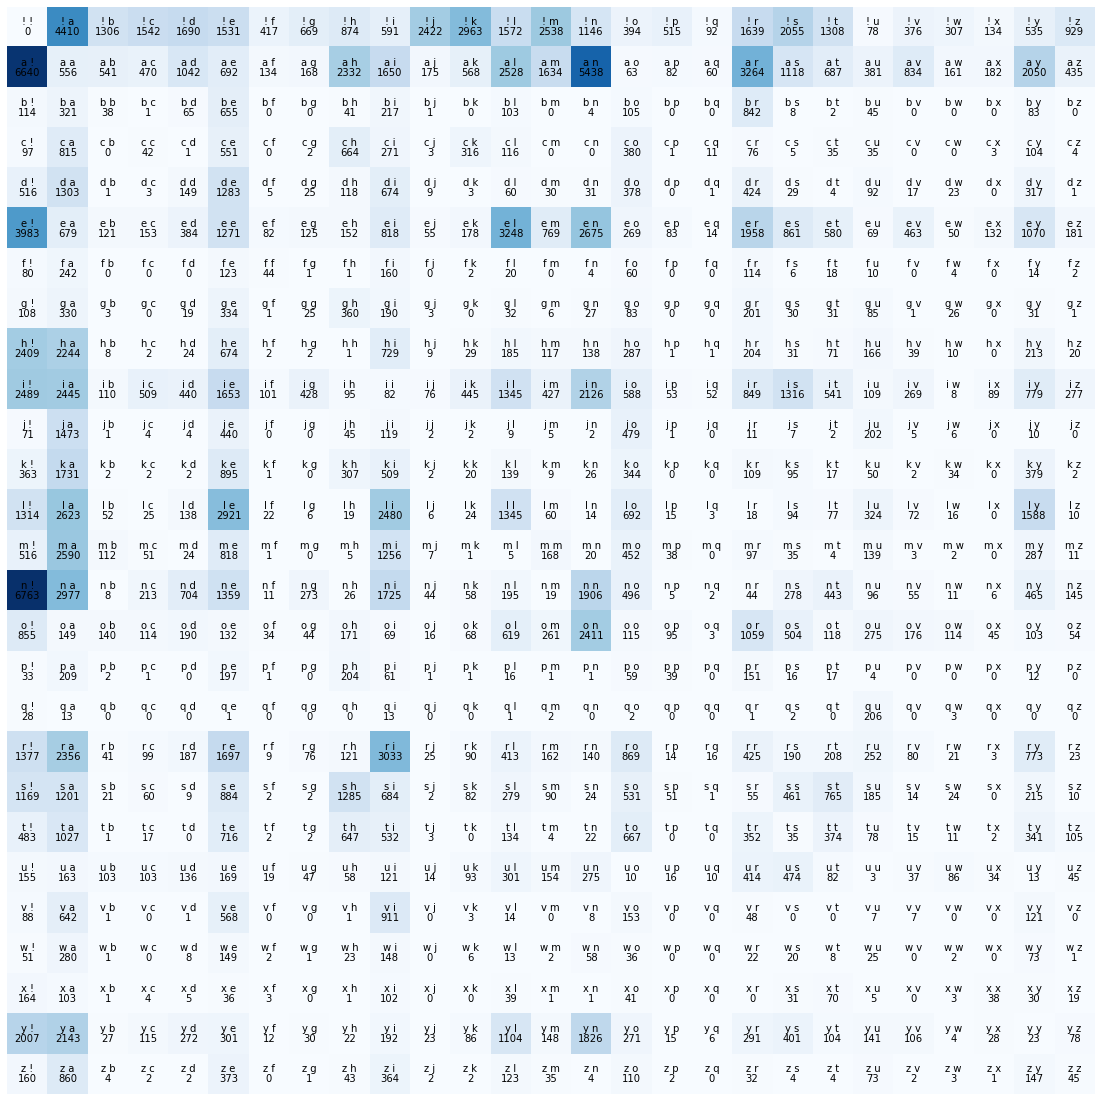

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = i_to_s[i] +' '+ i_to_s[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='black')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='black')
plt.axis('off');

In [76]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

### Sampling the data based on probablities

In [128]:
g = torch.Generator().manual_seed(2147483647)

In [129]:
p = N[0].float()
p = p / p.sum()

In [130]:
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [131]:
idx = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()

In [132]:
i_to_s[idx]

'j'

In [133]:
p = torch.rand(3, generator = g)
p = p / p.sum()

In [134]:
p

tensor([0.3344, 0.0995, 0.5661])

In [135]:
P = N.float() #matrix - P each row has probablities normalized to 1 ---> prob distribution for next character wrt char b4
# P.sum(1, keepdim = True)
P /= P.sum(1, keepdim = True) ###########    ########## 
                                 # 27      #  / # 27 X 1 #
                                 #    X    #    ##########
                                 #      27 #
                                 ###########    

In [137]:
for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(i_to_s[ix])
    if ix == 0:
      break
  print(''.join(out))

de!
janasah!
p!
cony!
a!


In [141]:
for w in word_list[:3]:                           
    w = ['!'] + list(w) + ['!']
    for char1, char2 in zip(w, w[1:]):
        _x = s_to_i[char1]
        _y = s_to_i[char2]
        print(f"{char1}{char2}")

!e
em
mm
ma
a!
!o
ol
li
iv
vi
ia
a!
!a
av
va
a!
